In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data_dir = Path.cwd().parent / "data"

In [39]:
features_df = pd.read_csv(data_dir / "training_set_features.csv",index_col = 0)
labels_df = pd.read_csv(data_dir / "training_set_labels.csv",index_col = 0)
print("features_df", features_df.shape)
features_df

features_df (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [40]:
binary_cols = ['sex', 'marital_status', 'rent_or_own', 'age_group', 'education', 'income_poverty']
onehot_cols = ['race', 'employment_status', 'hhs_geo_region', 'census_msa']
#numeric_cols = features_df.columns[features_df.dtypes != "object"].values
#print(numeric_cols)


In [41]:
features_df[binary_cols] = features_df[binary_cols].fillna(features_df[binary_cols].mode().iloc[0])
features_df[onehot_cols] = features_df[onehot_cols].fillna(features_df[onehot_cols].mode().iloc[0])

In [42]:
labelencoder = LabelEncoder()

for col in binary_cols:
    features_df[col] = labelencoder.fit_transform(features_df[col]).astype(np.float64)

In [43]:
onehotencoder = OneHotEncoder()

for col in onehot_cols:
    features_df[col] = onehotencoder.fit_transform(features_df[[col]]).toarray().astype(np.float64)

In [44]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                      float64
education                      float64
race                           float64
sex                            float64
income_poverty           

In [45]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'age_group' 'education'
 'race' 'sex' 'income_poverty' 'marital_status' 'rent_or_own'
 'employment_status' 'hhs_geo_region' 'census_msa' 'household_adults'
 'household_children']


In [46]:
#binary_pipeline = Pipeline([
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('label', LabelEncoder())
#])


In [47]:
#categorical_pipeline = Pipeline([
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OneHotEncoder())
#])

In [48]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [49]:
preprocessor = ColumnTransformer([
    #('binary', binary_pipeline, binary_cols),
    #('onehot', categorical_pipeline, onehot_cols),
    ('numeric', numeric_pipeline, numeric_cols)], 
    remainder='drop',
)

In [50]:
estimators = MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42))

In [51]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimators', estimators)
])

In [52]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavio...
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'income_poverty', 'marital_status', 'rent_or_own',
       'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)))])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df,
    labels_df,
    test_size = 0.3,
    shuffle = True,
    stratify= labels_df,
    random_state= 42,
)

In [54]:
print(X_train.columns)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [55]:
full_pipeline.fit(X_train, y_train)

preds = full_pipeline.predict_proba(X_test)
preds

[array([[0.92, 0.08],
        [0.77, 0.23],
        [0.97, 0.03],
        ...,
        [0.48, 0.52],
        [0.43, 0.57],
        [0.91, 0.09]]),
 array([[0.96, 0.04],
        [0.51, 0.49],
        [0.93, 0.07],
        ...,
        [0.25, 0.75],
        [0.08, 0.92],
        [0.36, 0.64]])]

In [56]:
print("test_probas[0].shape:", preds[0].shape)
print("test_probas[1].shape:", preds[1].shape)

test_probas[0].shape: (8013, 2)
test_probas[1].shape: (8013, 2)


In [57]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index,

)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
7572,0.08,0.04
3586,0.23,0.49
14114,0.03,0.07
2426,0.85,0.96
13147,0.10,0.97


In [58]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color = "grey", linestyle = "--")
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

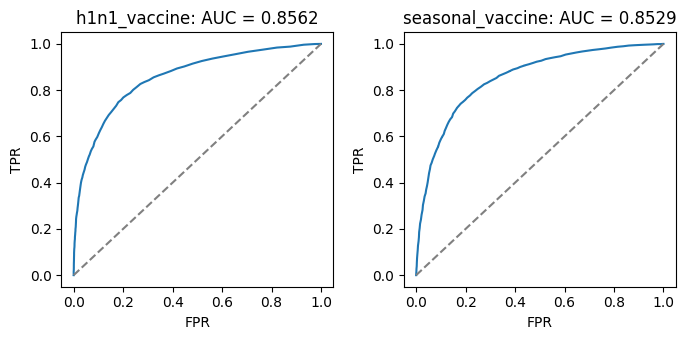

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (7, 3.5))

plot_roc(y_test["h1n1_vaccine"], y_preds["h1n1_vaccine"], "h1n1_vaccine", ax[0])
plot_roc(y_test["seasonal_vaccine"], y_preds["seasonal_vaccine"], "seasonal_vaccine", ax[1])

fig.tight_layout()

In [60]:
roc_auc_score(y_test, y_preds)

np.float64(0.8545625583944803)

In [61]:
%%time

full_pipeline.fit(features_df, labels_df)

None

CPU times: total: 5.89 s
Wall time: 6.39 s


In [62]:
test_features_df = pd.read_csv(data_dir / "test_set_features.csv", index_col = 0)
test_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [63]:
binary_cols = ['sex', 'marital_status', 'rent_or_own', 'age_group', 'education', 'income_poverty']
onehot_cols = ['race', 'employment_status', 'hhs_geo_region', 'census_msa']

In [64]:
test_features_df[binary_cols] = test_features_df[binary_cols].fillna(test_features_df[binary_cols].mode().iloc[0])
test_features_df[onehot_cols] = test_features_df[onehot_cols].fillna(test_features_df[onehot_cols].mode().iloc[0])

In [65]:
labelencoder = LabelEncoder()

for col in binary_cols:
    test_features_df[col] = labelencoder.fit_transform(test_features_df[col]).astype(np.float64)

In [66]:
onehotencoder = OneHotEncoder()

for col in onehot_cols:
    test_features_df[col] = onehotencoder.fit_transform(test_features_df[[col]]).toarray().astype(np.float64)

In [67]:
test_features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,fcxhlnwr,vlluhbov
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN


In [68]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.86, 0.14],
        [0.98, 0.02],
        [0.7 , 0.3 ],
        ...,
        [0.83, 0.17],
        [0.94, 0.06],
        [0.46, 0.54]]),
 array([[0.72, 0.28],
        [0.99, 0.01],
        [0.23, 0.77],
        ...,
        [0.65, 0.35],
        [0.65, 0.35],
        [0.38, 0.62]])]

In [69]:
submission_df = pd.read_csv(data_dir / "submission_format.csv", index_col = 0)
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [70]:
np.testing.assert_array_equal(test_features_df.index.values, submission_df.index.values)

submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.14,0.28
26708,0.02,0.01
26709,0.30,0.77
26710,0.64,0.91
26711,0.31,0.45


In [71]:
submission_df.to_csv("my_submission.csv", index=True)